# Mini Project 2: Data Exploration and Engineering 
### by Ahmad & Hanni.
  
The objective of this assignment is to enable you to build and train skills in business data exploration and
analysis by applying methods from statistics.

In [377]:
# libraries we need to import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [378]:
# 1) Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx.
# The data urls that contain the data
data_red = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-red.csv'
data_white = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-white.csv'

# Load the data
df_red = pd.read_csv(data_red, sep=';')
df_white = pd.read_csv(data_white, sep=';')

print(df_red.head())
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [380]:
# 2) Clean the data in both files.
# Check if there's any missing data
df_red.isnull().sum()
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [381]:
# There's not missing data. Let's check if there's any that are not NA
df_red.isna().sum()
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [382]:
# 3) Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.

# Add a column to identify the wine type
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

# Concatenate the dataframes
combined_wine_df = pd.concat([df_red, df_white])

#### Explore the data

In [388]:
# 4) Explore the features of the original and the new files:
# a. number of rows and columns
print('Rows and columns:')
print(f'Red original shape:', df_red.shape)
print('White original shape: ', df_white.shape)
print('Combined shape: ', combined_wine_df.shape)
print('\n')
# b. type of data in each column
print('Type of each column:')
print(f'Red original types:', df_red.dtypes)
print('White original types: ', df_white.dtypes)
print('Combined types: ', combined_wine_df.dtypes)
print('\n')

Rows and columns:
Red original shape: (1599, 13)
White original shape:  (4898, 13)
Combined shape:  (6497, 13)


Type of each column:
Red original types: fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object
White original types:  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type

In [389]:
# 5) Calculate the descriptive statistics of the numeric data. Check if the values of the attributes are normally distributed.
combined_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

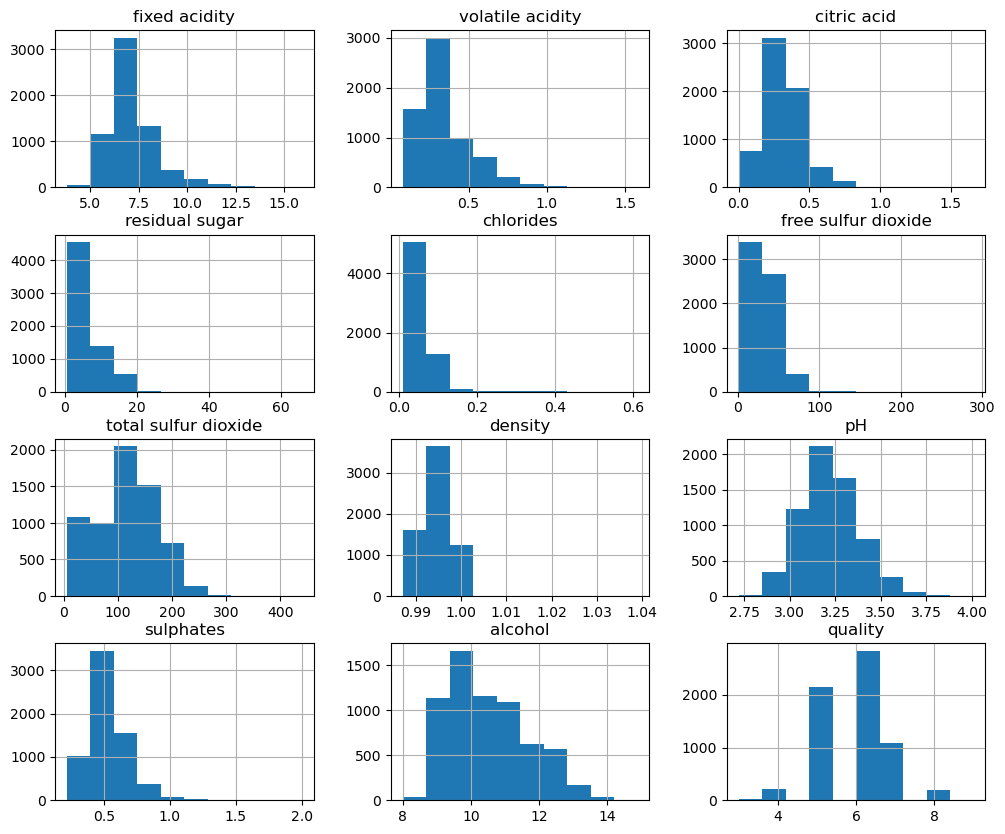

In [392]:
# Check if mean is equal to median (More likely to be ideally distributed)
combined_wine_df.hist(figsize=(12, 10))

# Fixed acidity: is normally distributed, because it almost forms a bell-form.
# Volatile acidity: is normally distributed, because it almost forms a bell-form.
# Citric acid: is normally distributed, because it almost forms a bell-form.
# Residual sugar: is not normally distributed, because it almost forms a bell-form.
# Chlorides: is not normally distributed, because it almost forms a bell-form.
# Free sulfur dioxide: is not normally distributed, because it almost forms a bell-form.
# Total sulfur dioxide: is normally distributed, because it almost forms a bell-form.
# Density: is normally distributed, because it almost forms a bell-form.
# pH: is normally distributed, because it almost forms a bell-form.
# Sulphates: is normally distributed, because it almost forms a bell-form.
# Alcohol: is normally distributed, because it almost forms a bell-form.
# Quality: is normally distributed, because it almost forms a bell-form.

In [393]:
# 6) Plot diagrams that visualize the differences in red and white wine samples. Use as many diagrams as appropriate. Use the diagrams as a support for answering the following questions:

# a. what do diagrams show exactly?
# Diagrams give us an easier and better overview of our observations.

Text(0, 0.5, 'Average Quality')

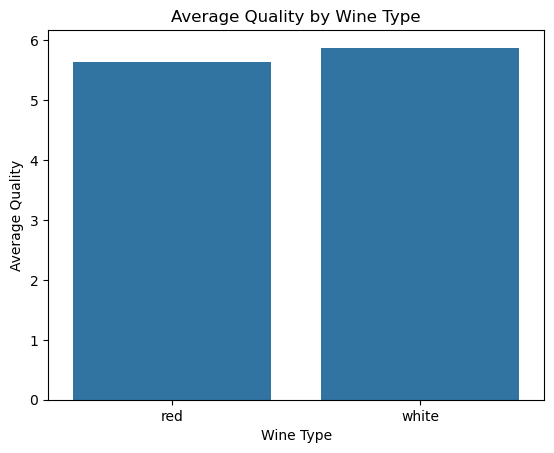

In [394]:
# b. which type of wine has higher average quality, how big is the difference? 

# Bar plot
average_quality = combined_wine_df.groupby('wine_type')['quality'].mean().reset_index()
sns.barplot(x='wine_type', y='quality', data=average_quality)
plt.title('Average Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Average Quality')

#   Conclusion: We can see that the white wine has a higher average quality. From looking at the bar plot we can see that the red 
# has an average of approximately 5.5 and that the white wine has an average 5.8. This makes the difference relatively small by 0.3.

Text(0, 0.5, 'Alcohol')

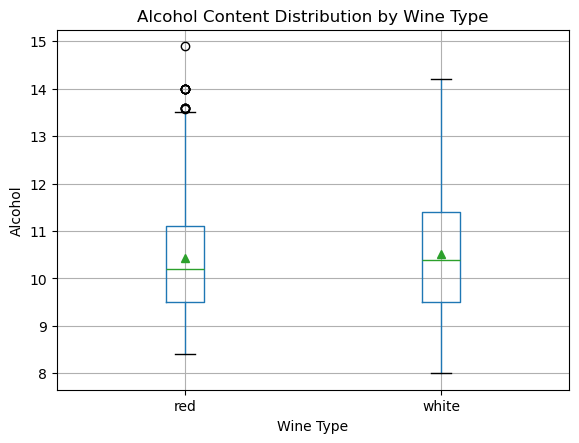

In [395]:
# c. which type of wine has higher average level of alcohol? 

# Whiskers Box-plot
combined_wine_df.boxplot(column=['alcohol'], by='wine_type', showmeans=True)
plt.title('Alcohol Content Distribution by Wine Type')
plt.suptitle('')  # Removes the automated title
plt.xlabel('Wine Type')
plt.ylabel('Alcohol')

#   Conclusion: We can see that the white wine has a higher average quality. From looking at the whiskers box plot we can see that the red 
# has an average of approximately 10.3 and that the white wine has an average 10.5. This makes the difference relatively small by 0.2.

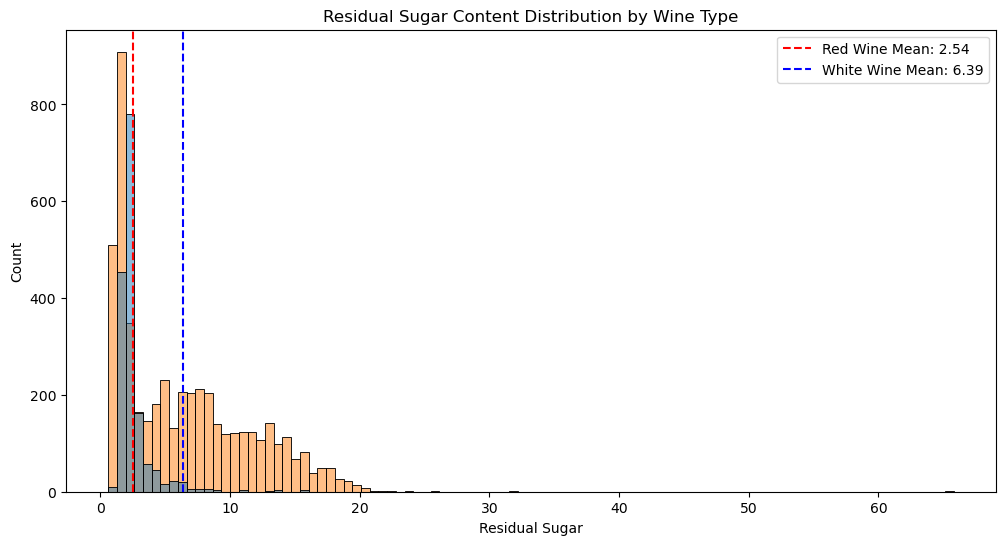

In [396]:
# d. which one has higher average quantity of residual sugar? 

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_wine_df, x='residual sugar', hue='wine_type')

# Calculate means for each wine type
mean_red = combined_wine_df[combined_wine_df['wine_type'] == 'red']['residual sugar'].mean()
mean_white = combined_wine_df[combined_wine_df['wine_type'] == 'white']['residual sugar'].mean()

# Plot vertical lines at the mean values
plt.axvline(mean_red, color='red', linestyle='--', label=f'Red Wine Mean: {mean_red:.2f}')
plt.axvline(mean_white, color='blue', linestyle='--', label=f'White Wine Mean: {mean_white:.2f}')

# Add labels and title
plt.title('Residual Sugar Content Distribution by Wine Type')
plt.xlabel('Residual Sugar')
plt.ylabel('Count')
plt.legend()

# Conclusion: This shows us that the white wine has an higher average of quantity of residual sugar.

Text(0.5, 1.0, 'Correlation between quality, alcohol, and residual sugar')

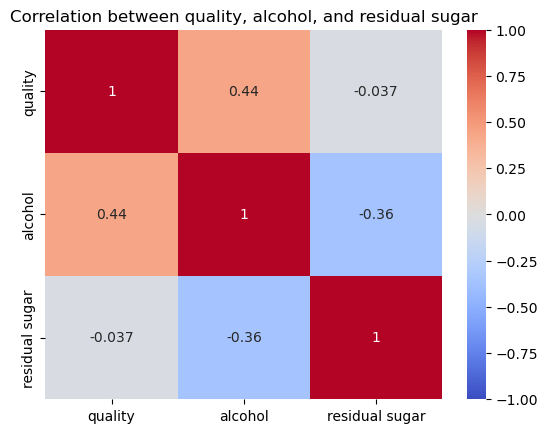

In [397]:
# e. do the quantity of alcohol and residual sugar influence the quality of the wine?

# Select the relevant columns for correlation
wine_corr = combined_wine_df[['quality', 'alcohol', 'residual sugar']]

sns.heatmap(wine_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between quality, alcohol, and residual sugar')

# Conclusion: This shows us that for alcohol yes, but for the residual sugar no, since the number is close to 0.

Text(0, 0.5, 'Count')

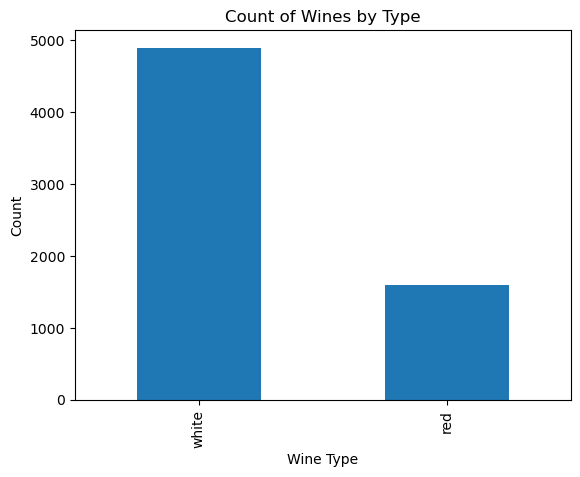

In [398]:
# Which other questions might be of interest for the wine consumers and which of wine distributers?

# a. are our observations of wine type equally?
# Bar charts
combined_wine_df['wine_type'].value_counts().plot(kind='bar')
plt.title('Count of Wines by Type')
plt.xlabel('Wine Type')
plt.ylabel('Count')

# Conclusion: No. It is not equally. White wine is dominating.

Text(0, 0.5, 'pH Level')

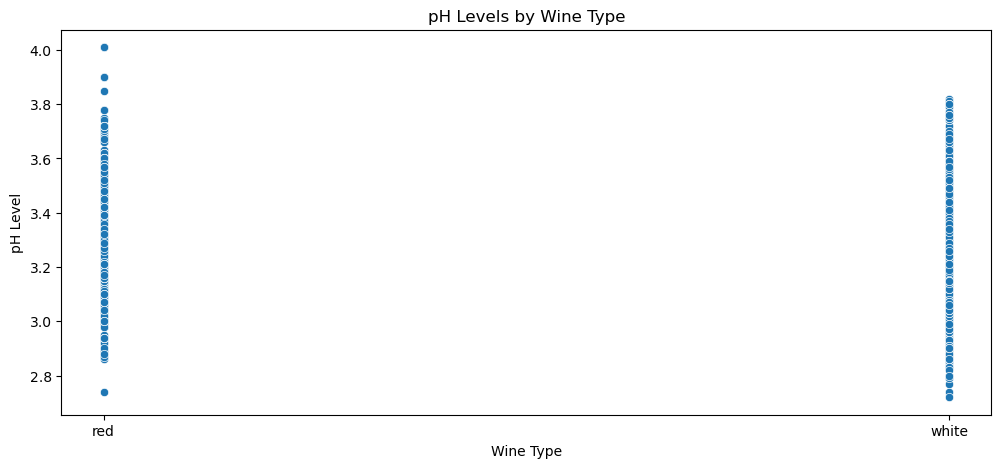

In [399]:
# b. which wine type has an higher maximum ph level?
# Scatterplot
plt.figure(figsize=(12, 5))
sns.scatterplot(data=combined_wine_df, x='wine_type', y='pH')
plt.title('pH Levels by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('pH Level')

# Conclusion: This shows us that it is clearly the red wine, which has an ph level of close to 4.2.

Text(0, 0.5, 'Alcohol Percentage')

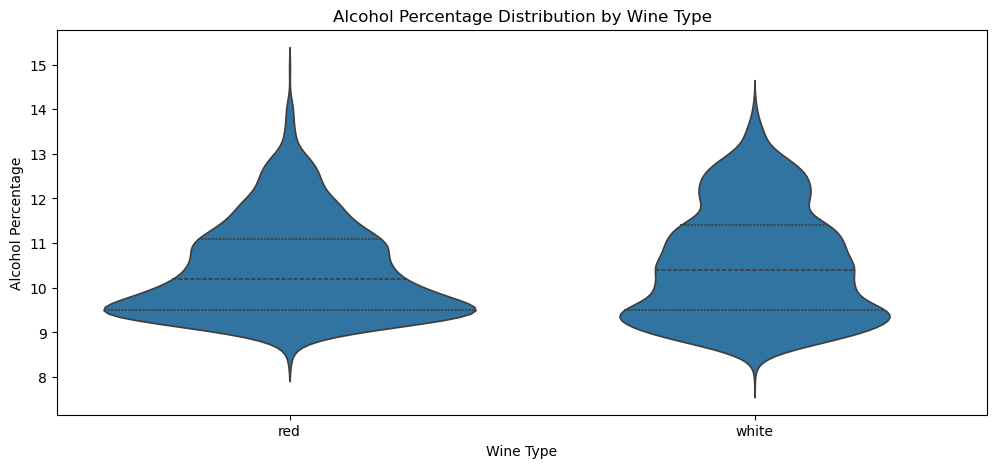

In [400]:
# c. which wine type has an higher alcohol percentage?
# Violin plot
plt.figure(figsize=(12, 5))
sns.violinplot(data=combined_wine_df, x='wine_type', y='alcohol', inner='quartile')
plt.title('Alcohol Percentage Distribution by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Alcohol Percentage')

# Conclusion: Red wine has an higher alcohol percentage with over 15, while it is for white wine is under than 15.

Text(0, 0.5, 'Count')

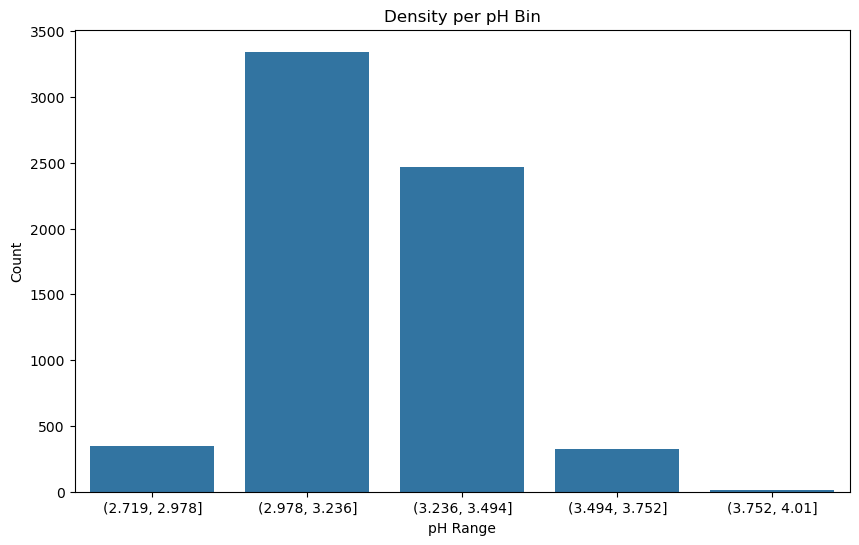

In [401]:
# 8. Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest density? 

# Bin the 'pH' attribute into 5 equal-sized bins
combined_wine_df['pH_bins'] = pd.cut(combined_wine_df['pH'], bins=5)

# Count the number of entries in each bin to find the density
pH_density = combined_wine_df['pH_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=pH_density.index.astype(str), y=pH_density.values)
plt.title('Density per pH Bin')
plt.xlabel('pH Range')
plt.ylabel('Count')

# Conclusion: The subset of highest density is: 2,978 - 3,236.

Text(0, 0.5, 'Count')

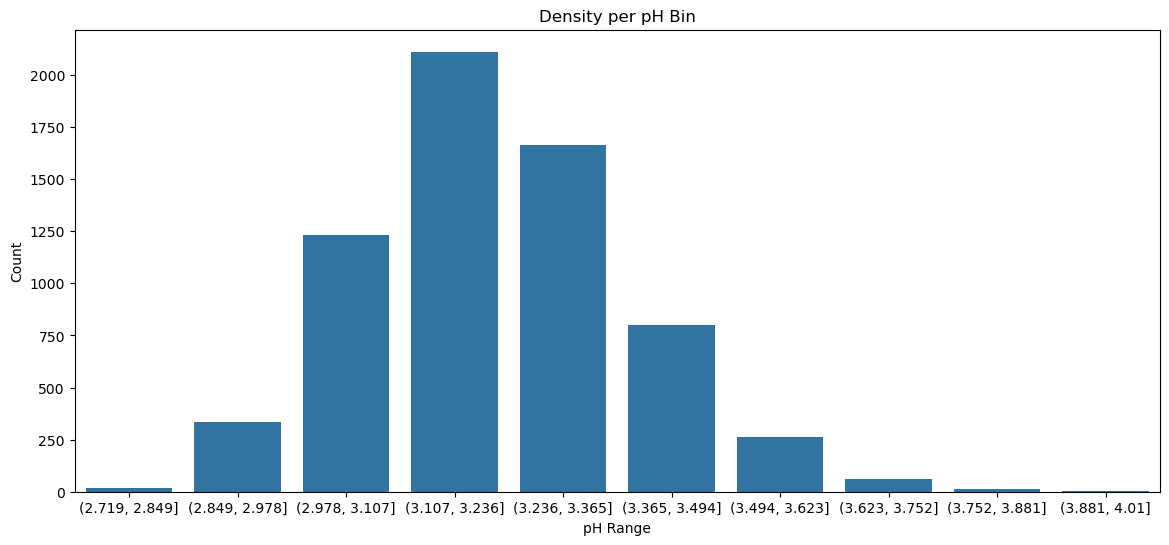

In [402]:
# 8. What if you split the data in ten subsets?

# Bin the 'pH' attribute into 10 equal-sized bins
combined_wine_df['pH_bins'] = pd.cut(combined_wine_df['pH'], bins=10)

# Count the number of entries in each bin to find the density
pH_density = combined_wine_df['pH_bins'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=pH_density.index.astype(str), y=pH_density.values)
plt.title('Density per pH Bin')
plt.xlabel('pH Range')
plt.ylabel('Count')

# Conclusion: The subset of highest density is: 3,107 - 3,236

Text(0.5, 1.0, 'Correlation Matrix of Wine Attributes')

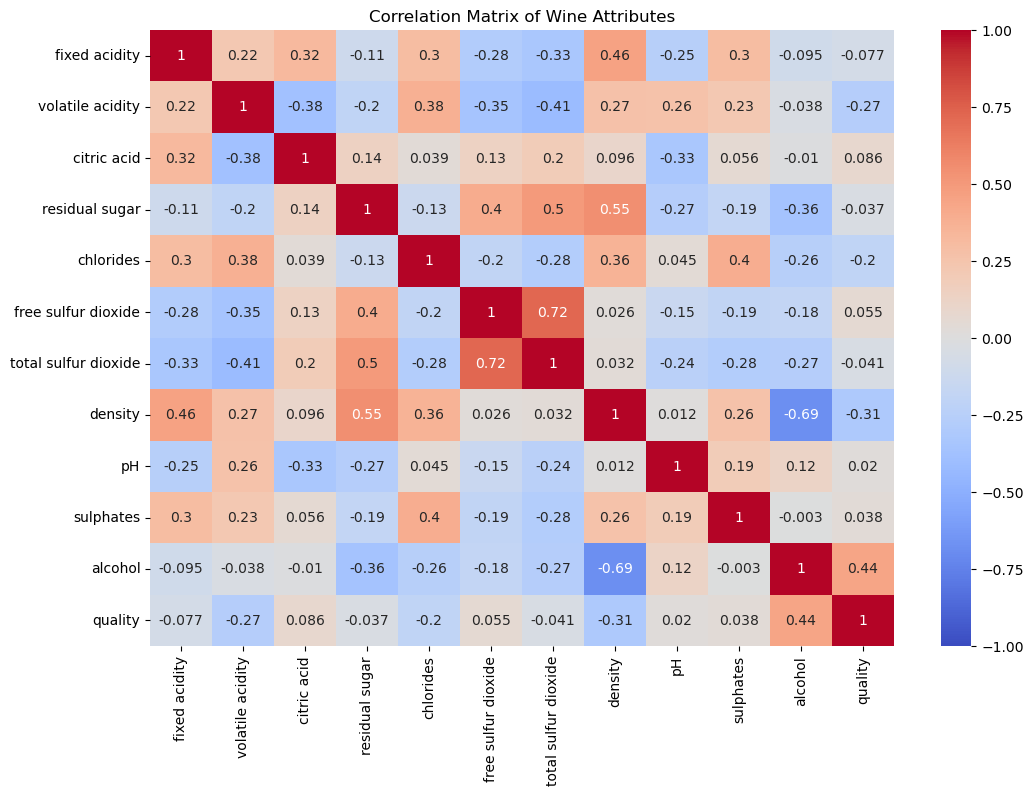

In [403]:
# 9. Create a heat map or a correlation matrix of all data and investigate it. Can you tell which wine
# attribute has the biggest influence on the wine quality? Which has the lowest? 

# Drop non-numeric columns (like 'wine_type') from the DataFrame
numeric_wine_df = combined_wine_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix using only numerical columns
correlation_matrix = numeric_wine_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Matrix of Wine Attributes')

# Conclusion: Alcohol has the highest influence on the quality. The one with the lowest influence is both chlorides and ph level, but since chlorides
# is negative and ph level is positive, it makes chlorides the one with the lowest influence.

In [406]:
# Are there any attributes, apart from the wine quality, which are highly correlated?

# Conclusion: Yes. Total sulfur dioxide and free sulfur dioxide is highly correlated.

In [407]:
# 10. Do you get the same correlation results when you analyze the red and the white wine data sets separately?

Text(0.5, 1.0, 'Correlation Matrix of Wine Attributes')

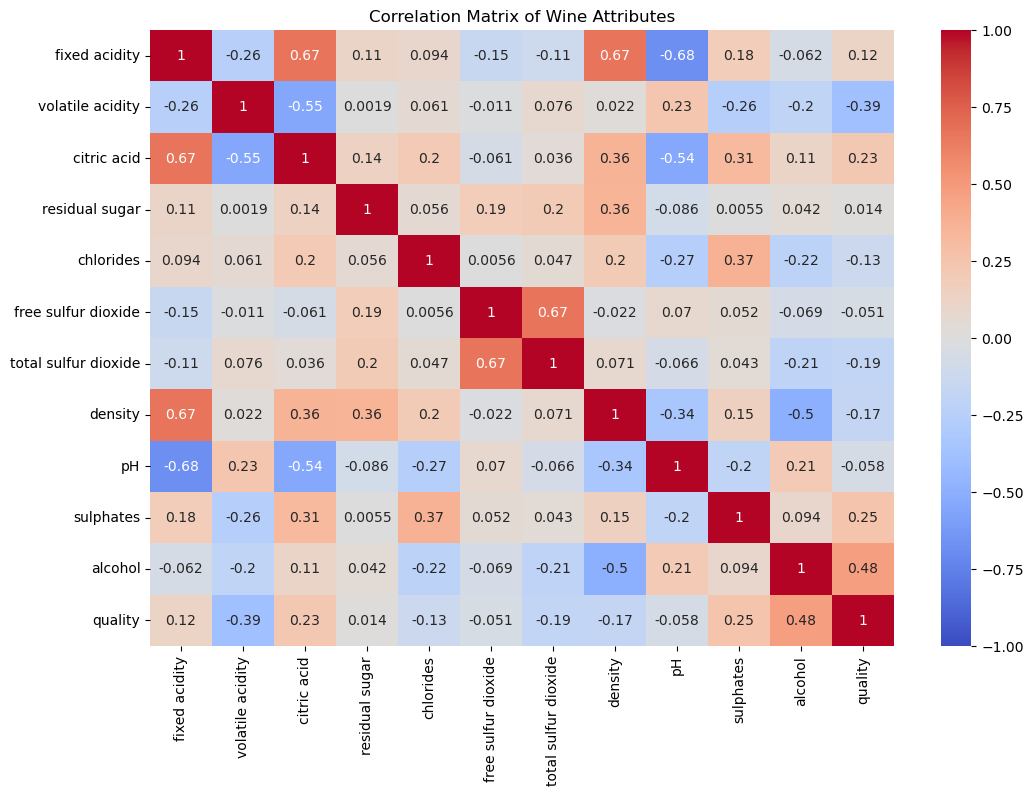

In [409]:
# Red

numeric_wine_df = df_red.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_wine_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Attributes')

Text(0.5, 1.0, 'Correlation Matrix of Wine Attributes')

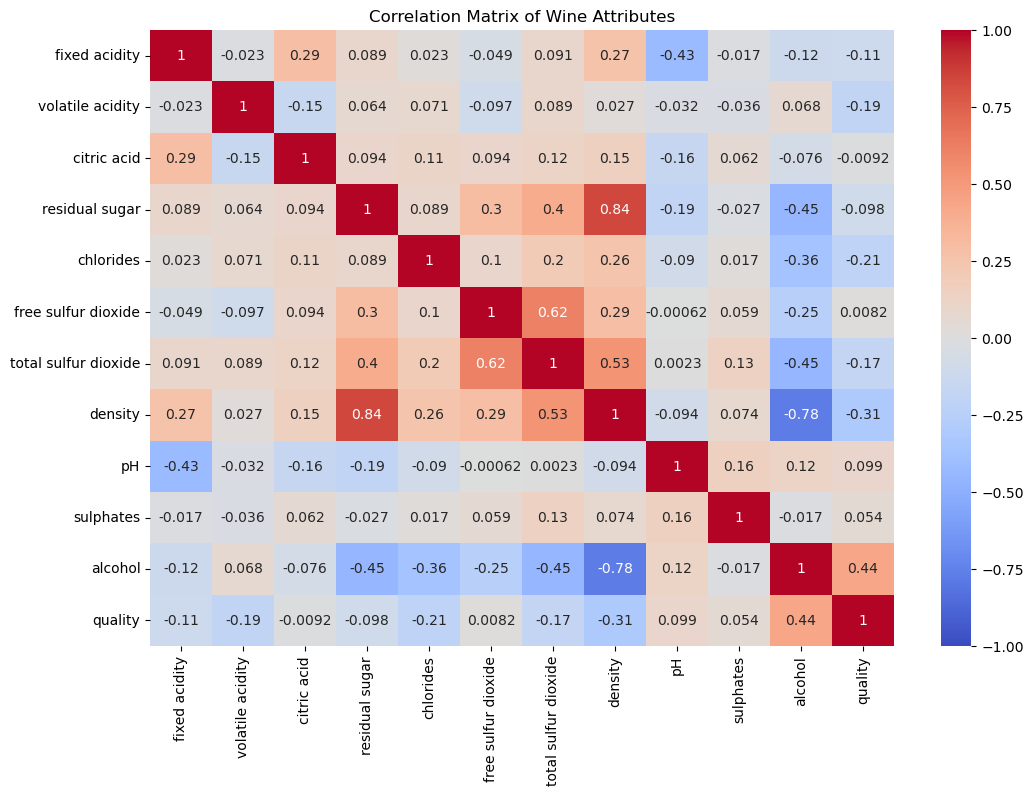

In [411]:
# White

# Red

numeric_wine_df = df_white.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_wine_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Attributes')

In [412]:
# Conclusion: No. It shows us that other values are correlated when splitting them.

Text(0.5, 0, 'Residual Sugar')

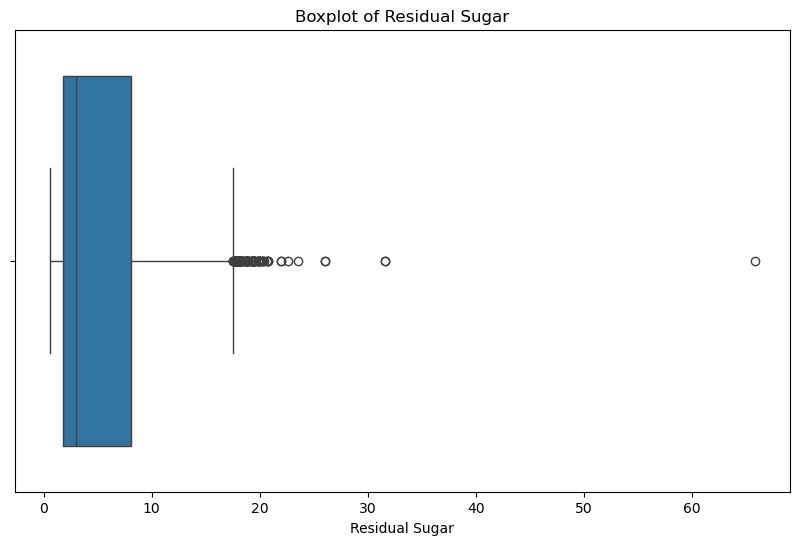

In [413]:
# 11. Explore the feature ‘residual sugar’. Does it contain outliers? On which rows of the data frame are they found? Remove those rows.

plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_wine_df['residual sugar'])
plt.title('Boxplot of Residual Sugar')
plt.xlabel('Residual Sugar')

In [414]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = combined_wine_df['residual sugar'].quantile(0.25)
Q3 = combined_wine_df['residual sugar'].quantile(0.75)

# The method to find the interquartile range
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers = combined_wine_df[(combined_wine_df['residual sugar'] < (Q1 - outlier_step)) |
                            (combined_wine_df['residual sugar'] > (Q3 + outlier_step))]

# Display all the outlier rows
print(outliers)

# Removing the outlier rows
cleaned_wine_df = combined_wine_df[~((combined_wine_df['residual sugar'] < (Q1 - outlier_step)) |
                                      (combined_wine_df['residual sugar'] > (Q3 + outlier_step)))]

# Display all the outlier rows
print(f"Number of outlier rows before getting removed: {combined_wine_df.shape[0]}")
print(f"Number of outlier rows after getting removed: {cleaned_wine_df.shape[0]}")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
7               7.0             0.270         0.36           20.70      0.045   
14              8.3             0.420         0.62           19.25      0.040   
38              7.3             0.240         0.39           17.95      0.057   
39              7.3             0.240         0.39           17.95      0.057   
...             ...               ...          ...             ...        ...   
4691            6.9             0.190         0.31           19.25      0.043   
4694            6.9             0.190         0.31           19.25      0.043   
4748            6.1             0.340         0.24           18.35      0.050   
4749            6.2             0.350         0.25           18.40      0.051   
4778            5.8             0.315         0.19           19.40      0.031   

      free sulfur dioxide  

Text(0.5, 1.0, 'Correlation of Attributes with Wine Quality')

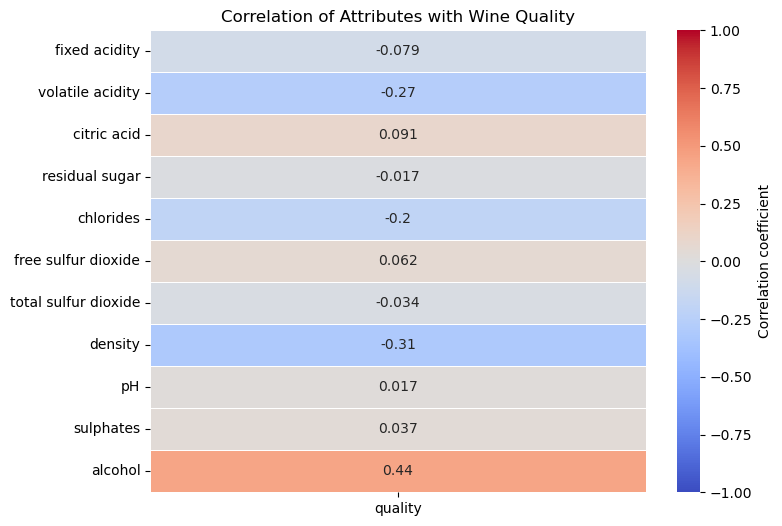

In [416]:
# 12. Remove the attributes with the lowest correlation to the wine quality and any one highly correlated to another independent attribute

numeric_wine_df = cleaned_wine_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_wine_df.corr()

# Filter to keep only the rows and columns related to 'quality'
quality_corr_matrix = correlation_matrix[['quality']].copy()
quality_corr_matrix = quality_corr_matrix.drop('quality', axis=0, errors='ignore')

# Create a heatmap for the 'quality' column only
plt.figure(figsize=(8, 6))
sns.heatmap(quality_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation coefficient'}, linewidths=0.5)

# Add title
plt.title('Correlation of Attributes with Wine Quality')

Text(0.5, 1.0, 'Correlation of Attributes with Wine Quality')

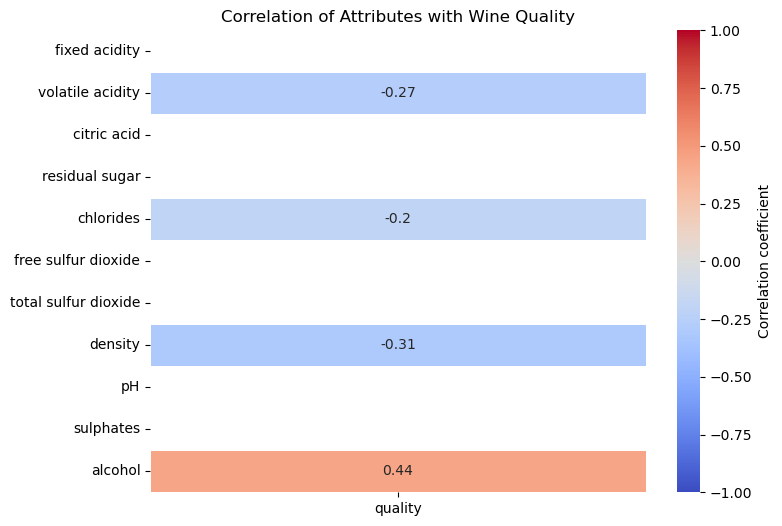

In [417]:
# Now let's remove all the correlated values that have an value under 0,10 and 0,40.

numeric_wine_df = cleaned_wine_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_wine_df.corr()

# Filter to keep only the rows and columns related to 'quality'
quality_corr_matrix = correlation_matrix[['quality']].copy()
quality_corr_matrix = quality_corr_matrix.drop('quality', axis=0, errors='ignore')

# Remove attributes with correlation values under 0.10 and over 0.50
filtered_corr_matrix = quality_corr_matrix[(quality_corr_matrix.abs() >= 0.10) & (quality_corr_matrix.abs() <= 0.50)]

# Create a heatmap for the 'quality' column only
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation coefficient'}, linewidths=0.5)
plt.title('Correlation of Attributes with Wine Quality')

In [423]:
# 13. Transform the categorical data into numeric, applying appropriate coding methods

# Apply One-Hot Encoding
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    for col in processed_df.select_dtypes(include=['object']).columns:
        processed_df[col] = le.fit_transform(processed_df[col])
    return processed_df

In [427]:
dfp = preprocessor(cleaned_wine_df)

In [431]:
# 14. Print out ten random rows from the final dataset as a prove of concept.

dfp.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,pH_bins
3257,7.4,0.19,0.31,14.50,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6,1,"(2.978, 3.107]"
1005,6.8,0.36,0.32,1.80,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7,0,"(3.236, 3.365]"
1728,6.8,0.30,0.24,6.60,0.123,35.0,116.0,0.99530,3.07,0.48,9.4,5,1,"(2.978, 3.107]"
1498,7.7,0.27,0.49,1.80,0.041,23.0,86.0,0.99140,3.16,0.42,12.5,6,1,"(3.107, 3.236]"
2102,6.2,0.34,0.30,11.10,0.047,28.0,237.0,0.99810,3.18,0.49,8.7,5,1,"(3.107, 3.236]"
1156,8.5,0.18,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,0,"(3.236, 3.365]"
673,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,0,"(3.107, 3.236]"
2984,6.9,0.30,0.30,10.55,0.037,4.0,28.0,0.99184,3.07,0.32,12.7,6,1,"(2.978, 3.107]"
1359,6.5,0.19,0.32,1.40,0.040,31.0,132.0,0.99220,3.36,0.54,10.8,7,1,"(3.236, 3.365]"
1527,7.1,0.53,0.07,1.70,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,6,0,"(3.236, 3.365]"
